# Lung Vessel Segmentation for Covid-19 diagnosis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import nibabel as nib
from ipywidgets import interactive, fixed

from skimage import morphology as morpho
from skimage.measure import label
from skimage.color import label2rgb, rgb2gray
from skimage.filters import threshold_otsu
from scipy import ndimage as ndi
from skimage.morphology import skeletonize
from copy import deepcopy

## Image loading

In [4]:
filename = "../data/images/"+os.listdir("../data/images")[0]
filename_mask = "../data/lung_mask/"+os.listdir("../data/lung_mask")[0]

In [19]:
filename_mask

'../data/lung_mask/VESSEL12_09.nii'

In [5]:
img = nib.load(filename)
img_mask = nib.load(filename_mask)

im_arr = img.get_fdata()
mask_arr = img_mask.get_fdata()

In [4]:
sx, sy, sz = im_arr.shape

def show_axial(im_arr, mr_slice):
    plt.figure(figsize=(10, 10))
    plt.imshow(im_arr[:, :, mr_slice].T)
    plt.axis('off')
    plt.pause(0.1)
   
### Show the MR volume, slice by slice, in axial view
interactive_plot = interactive(show_axial, im_arr=fixed(im_arr), mr_slice=im_arr.shape[2]//2)
interactive_plot

interactive(children=(IntSlider(value=256, description='mr_slice', max=768, min=-256), Output()), _dom_classes…

## Preprocessing
Image normalization

In [6]:
def normalize(im):
    return 255*(im - im.mean())/im.max()

In [7]:
#example on one slice
im_test = normalize(im_arr[185])
im_mask_test = mask_arr[185]

In [4]:
def show(images, titles=None, size = 10):
    plt.figure(figsize=(size, size))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap="gray")
        if (titles):
            plt.title(titles[i])
    plt.show()

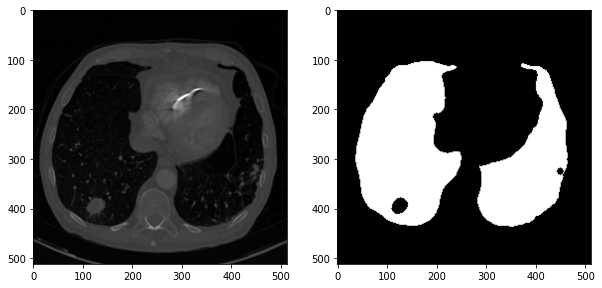

In [9]:
show([im_test, im_mask_test])

In [10]:
def apply_mask(image, mask):
    return image*mask

Binarisation and apply mask on the lungs

## Segmentation

In [3]:
## LOAD RORPO ##
mg = nib.load("test_label.nii").get_fdata()
rorpo = mg[185]
show([mg[185]])

NameError: name 'show' is not defined

In [16]:
rorpo.shape

(512, 512, 3)

In [12]:
rorpo[:, :, 0] *= im_mask_test
rorpo[:, :, 1] *= im_mask_test
rorpo[:, :, 2] *= im_mask_test

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


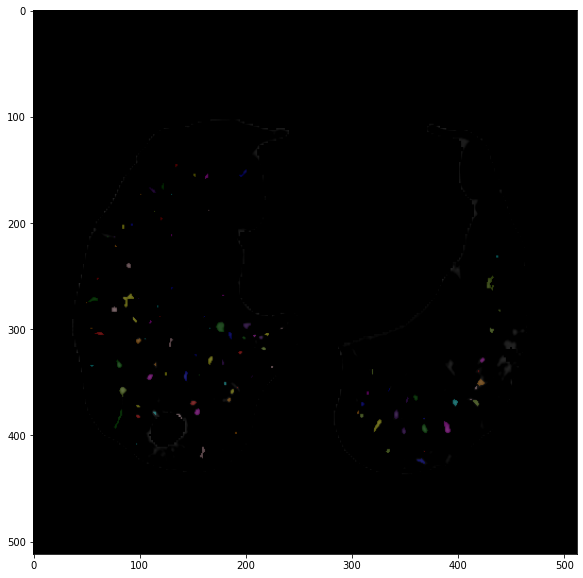

In [13]:
show([rorpo])

In [14]:
test_rorpo = deepcopy(rorpo)

In [15]:
test_rorpo_gray = test_rorpo@[0.3, 0.6, 0.1]

In [84]:
bin_rorpo = (test_rorpo_gray > threshold_otsu(test_rorpo_gray)).astype(int)
bin_rorpo = bin_rorpo * morpho.erosion(im_mask_test, morpho.disk(2))

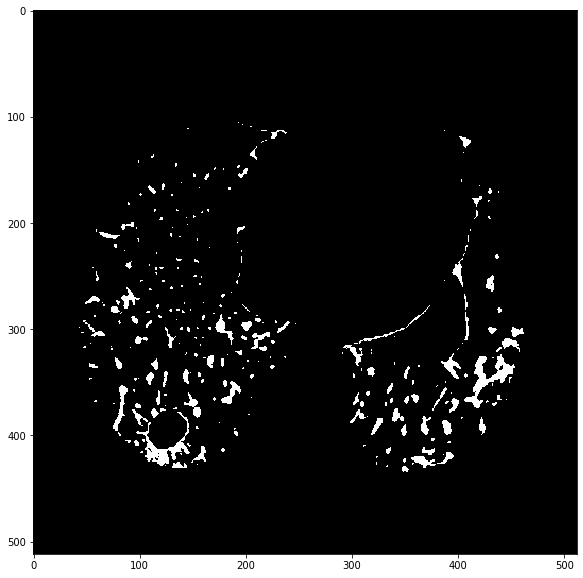

In [85]:
show([bin_rorpo])

In [50]:
# test_rorpo[test_rorpo != 0] = 1

## Distance map

In [86]:
distance = ndi.distance_transform_edt(bin_rorpo)

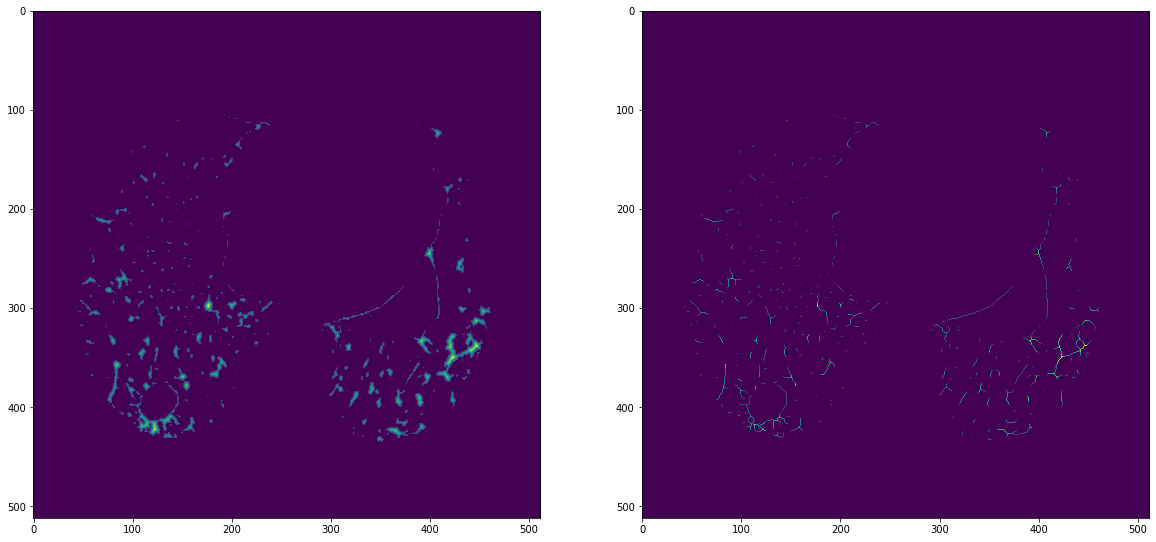

In [121]:
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(distance)
plt.subplot(122)
skeleton = skeletonize(bin_rorpo)
plt.imshow(skeleton*distance)
plt.show()

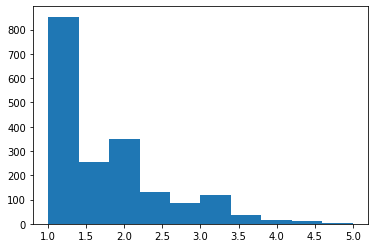

In [119]:
skel = (skeleton*distance).flatten()
plt.hist(np.delete(skel, np.where(skel == 0)))
plt.show()

DONE : 
nbr_voxel

On aurait voulut suivre le vaisseau mais ca a l'air trop dur
cependant faire l'etude sur chaque voxel du label semble revenir au meme.
Les max/min permettent de mettre en avant des dilatations
dist_per_label : 
        -mean per label     
        -mean per mean per label     
        -mean per max per label     
        -max per max per label     
        -max per label     
TODO : 
Comme du mal a l'exploiter mais go le plot quand on pourra ca donnera des idées.
histogram dist per label :
        - max pic ? 
        - X% de all autour du pic ?
        - plot 

dist per label :
    - ecart type per label
    - ecart type total

- volume per label ( nbr voxel per label )
- mean volume
- max volume 
- min volume 
- ecart type 
min dist_perlabel 
mean min dist_perlabel 

// traduire si rorpo marche bien 
skeleton : 

    - longueure per label
    - longueure mean 
    - longueure max 
    - longueure min

In [2]:
img = nib.load("seg_2d.nii").get_fdata()

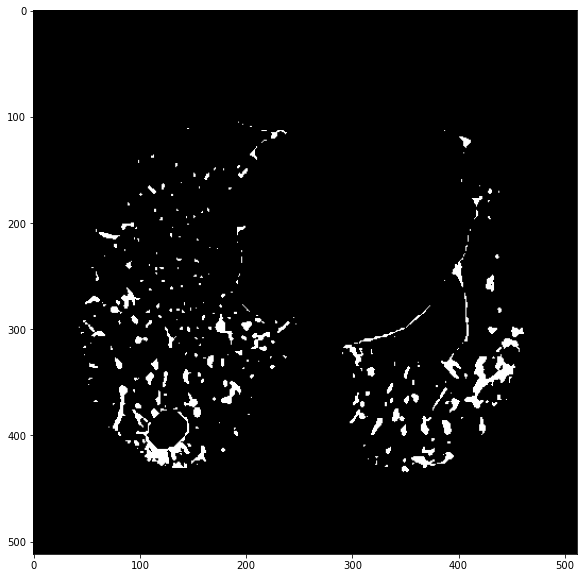

In [5]:
show([img[185]])

In [ ]:
skel = skeletonize(img)

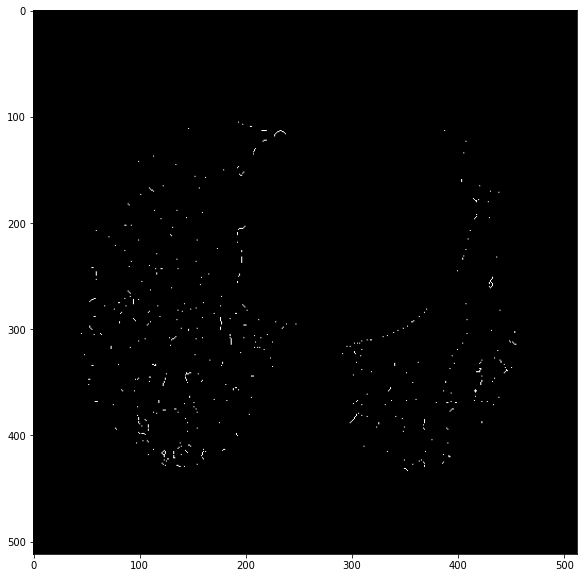

In [17]:
show([skel[185]])

In [18]:
img = nib.Nifti1Image(skel, np.eye(4, 4))
img.header.get_xyzt_units()
nib.save(img, os.path.join('skel.nii'))

In [ ]:
# test[185]